<a href="https://colab.research.google.com/github/fanny/information-retrieval/blob/master/lab3/tokenizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re

import pandas as pd
import numpy as np

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('https://raw.githubusercontent.com/fanny/information-retrieval/master/lab2/data/results.csv')
data.head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


,_id,author,date,section,sub_title,text,title,url
0,7,NaN,05/04/2019 |,agronegocio,NaN,NaN,\t\t\t\t,https://www.gazetadopovo.com.br/agronegocio/ex...
1,2,NaN,NaN,wiseup-news,NaN,NaN,NaN,https://www.gazetadopovo.com.br/wiseup-news/bo...
2,3,NaN,NaN,futebol,NaN,NaN,NaN,https://especiais.gazetadopovo.com.br/futebol/...
3,9,NaN,05/04/2019 |,agronegocio,NaN,NaN,Suspensão de frigoríficos não impediu alta de ...,https://www.gazetadopovo.com.br/agronegocio/ag...
4,1,The Daily Signal,NaN,ideias,NaN,Pessoas que buscam uma identidade transsexual ...,Populares,https://www.gazetadopovo.com.br/ideias/nao-se-...
5,5,Gazeta do Povo,NaN,curitiba,NaN,"Depois de uma semana de calor, Curitiba terá u...",Populares,https://www.gazetadopovo.com.br/curitiba/previ...
6,40,"Flávia Alves, especial para a Gazeta do Povo",NaN,viver-bem,NaN,As promessas são muitas: combater o envelhecim...,NaN,https://www.gazetadopovo.com.br/viver-bem/saud...
7,6,Agência Estado,NaN,republica,NaN,"O líder do MDB na Câmara, Baleia Rossi (SP), p...",Populares,https://www.gazetadopovo.com.br/republica/pec-...
8,20,Daniel Malucelli,[05/04/2019],esportes,mercado,O meia-atacante Maicosuel está com a situação ...,Paraná não descarta dispensa de Maicosuel ante...,https://www.gazetadopovo.com.br/esportes/paran...
9,10,Renyere Trovão,NaN,automoveis,NaN,Concretizar a compra de um carro novo nem semp...,Populares,https://www.gazetadopovo.com.br/automoveis/car...


In [0]:
clean_text = data['text'].dropna()
def filter_by_criteria(text, criteria):
  filtered_words = re.findall(criteria, text)
  filtered_words = ' '.join(filtered_words)
 
  return filtered_words

In [0]:
def get_words_filtered(criteria):
  filtered_text = clean_text.apply(lambda text: filter_by_criteria(text, criteria))
  all_filtered_text = filtered_text.str.cat(sep=' ')
  all_words_filtered = all_filtered_text.split(' ')

  all_words_filtered = [text for text in all_words_filtered if len(text) > 0]

  return set(all_words_filtered[:200])

## Tokenização

> Tokenização é o processo de formar palavras de uma sequência de caracteres em um documento    

**Obs: Texto extraido do livro**

E para formar essas palavras podemos usar alguns critérios, como:
- Quantidade de caracteres; Palavras hifenizadas; Caracteres especiais;
- Caracteres em Caixa Alta ou Baixa; Apostrófos; Números; Abreviações;

Cada critério desse, pode guardar uma importância, se tratando dessa base de dados de notícias, alguns poderão ser mais relevantes que outros e veremos o motivo.

Para conseguir concluir quais critérios usar no processo de tokenização, começaremos analisando os dados, garantindo assim que não ignoremos palavras que são importantes.

Se você quiser pular essa parte de análise, e ir para os critérios de tokenização que irei considerar, [clique aqui](https://render.githubusercontent.com/view/ipynb?commit=3aa1a951d290c773c01ddb07cab56c8dea75fa8d&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f66616e6e792f696e666f726d6174696f6e2d72657472696576616c2f336161316139353164323930633737336330316464623037636162353663386465613735666138642f6c6162332f746f6b656e697a696e672e6970796e62&nwo=fanny%2Finformation-retrieval&path=lab3%2Ftokenizing.ipynb&repository_id=180594470&repository_type=Repository#Conlus%C3%B5es-dos-crit%C3%A9rios-de-tokeniza%C3%A7%C3%A3o), mas tenha em mente que só explico os fatores que me levaram a tomar essa decisão aqui embaixo.

### Quantidade de caracteres

A primeira suposição é que palavras com quantidade menores que 3 geralmente não são importantes, porque representam artigos, preposições etc, que não agregam tanto valor na busca.

#### Resultados

In [4]:
get_words_filtered(r'\b\w{0,3}\b')


{'1',
 '500',
 '743',
 '744',
 '80',
 'A',
 'APA',
 'As',
 'Em',
 'Eu',
 'L',
 'Não',
 'O',
 'a',
 'aos',
 'as',
 'com',
 'da',
 'das',
 'de',
 'diz',
 'do',
 'e',
 'ela',
 'ele',
 'em',
 'eu',
 'fez',
 'gay',
 'há',
 'lo',
 'lê',
 'me',
 'na',
 'nem',
 'no',
 'nos',
 'não',
 'o',
 'os',
 'ou',
 'pai',
 'por',
 'que',
 'se',
 'ser',
 'seu',
 'si',
 'um',
 'uma',
 'uso',
 'à',
 'às',
 'é'}

A título de informação, só mostramos o set das 200 primeiras, mas olhando os dados podemos observar coisas interessantes como:

- Palavras capitalizadas indicam Siglas - APA, PIB, IPI, IVA, PEC, RJ
- Números só com um dígito, não são relevantes
- Ocorrem palavras com tamanho menor ou igual a dois que são importantes, indicam siglas, como 'RJ', 'PEC' e outras que o seu próprio significado tem muito valor, como 'gay' e 'pai'

Sendo assim, removeremos as palavras de tamanho 1 e as stopwords do brasil.


### Palavras hífenizadas

Provavelmente palavras com hífen serão muito importantes, porque elas representam dias da semana, nomes geográficos(Grã-Bretanha), certas espécies de animais e vegetais(Bem-te-vi, Couve-Flor) alguns adjetivos (mal-humorada) dentre outras.

In [5]:
get_words_filtered(r'[a-zA-Z]+\-[a-zA-Z]+')


{'Advocacia-Geral',
 'Centro-Oeste',
 'Controladoria-Geral',
 'DEM-RJ',
 'Deve-se',
 'Espera-se',
 'Estima-se',
 'Evidence-Based',
 'Jin-myung',
 'Junte-se',
 'MP-PR',
 'Mercedes-Benz',
 'Norte-Americana',
 'Norte-Sul',
 'PCdoB-AC',
 'PR-SP',
 'PRB-GO',
 'PSB-MG',
 'PSL-MG',
 'PSL-PR',
 'PSL-RN',
 'PSL-SP',
 'PSOL-RJ',
 'PT-MG',
 'PT-PR',
 'PT-RS',
 'PT-SP',
 'Procuradoria-Geral',
 'Recusar-se',
 'Rubro-Negro',
 'Santa-C',
 'Sul-Americana',
 'Trata-se',
 'a-feira',
 'a-tarefa',
 'advogado-geral',
 'ajudando-os',
 'anti-imperialistas',
 'anti-inflamat',
 'bate-boca',
 'batia-boca',
 'bem-estar',
 'bem-vinda',
 'bem-vindo',
 'boa-f',
 'busca-se',
 'caixas-preta',
 'contra-argumentar',
 'diga-se',
 'diretor-geral',
 'e-mail',
 'editor-chefe',
 'enviando-os',
 'es-p',
 'es-tanque',
 'ex-Iugosl',
 'ex-PPS',
 'ex-assessor',
 'ex-carpinteiro',
 'ex-comunistas',
 'ex-embaixador',
 'ex-goleiro',
 'ex-governador',
 'ex-ministro',
 'ex-presidente',
 'ex-presidentes',
 'ex-rep',
 'franco-brit',
 '

De fato, foram encontrados dias da semana, partidos, cargos, e muitas palavras importantes com hífen demonstrando que elas não devem ser removidas.

### Caracteres especiais

Também podem ser importantes, basta pensarmos em '%' que pode indicar percentuais, '$' que pode indicar dinheiro, 'º' que pode inficar uma posição, enfim, veremos a seguir, se esses símbolos são importantes no texto.

Olhando símbolos nos textos, além da nossa suposição, foram encontrados certos delimitadores, que não acrescentam informações no texto como:
- '\r\n'
- '\xaO'  
Sendo assim, removeremos eles.

### Apóstrofos

Podem indicar marcas (Burguer’s King, McDonald’s) extrangeiras, ou uma “composição” de palavras como: pingo d’ água

#### Resultados

In [6]:
get_words_filtered(r"\w+\'\w*")

{"Amadurecimento'",
 "Gattaca'",
 "atualizar'",
 "chavismo'",
 "equipe'",
 "executivo'",
 "fontes'",
 "ganhar'",
 "iminente'",
 "merda'",
 "olavetes'",
 "papel'",
 "poços'",
 "revolução'",
 "unicórnio'",
 "vertical'"}

As palavras encontradas com apóstrofo,  provavlmente são erros de digitação/formatação, fazendo mais sentido da replace pra um caractere vazio, e não considerar o hífen na tokenização.

### Números

Números são extremamente importantes, podem indicar horas, salários, anos, posições, temperaturas, etc.

#### Resultados


In [7]:
get_words_filtered(r'\d+\w+')

{'00',
 '000',
 '004',
 '01',
 '03',
 '05',
 '07',
 '09',
 '10',
 '100',
 '11',
 '12',
 '13',
 '13º',
 '14',
 '15',
 '15ºC',
 '16',
 '18',
 '18ºC',
 '19',
 '1931',
 '1961',
 '1970',
 '1979',
 '1983',
 '1997',
 '1998',
 '1999',
 '19ºC',
 '1º',
 '20',
 '2002',
 '2004',
 '2005',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '21',
 '21ºC',
 '22',
 '22ºC',
 '23ºC',
 '24',
 '25',
 '25ºC',
 '260',
 '27',
 '27ºC',
 '28',
 '29',
 '297',
 '30',
 '300',
 '304',
 '32',
 '33',
 '349',
 '35',
 '36',
 '37',
 '377',
 '40',
 '41',
 '455',
 '457',
 '471',
 '500',
 '51',
 '53',
 '55',
 '553',
 '58',
 '5ª',
 '600',
 '623',
 '627',
 '630',
 '64',
 '669',
 '68',
 '682',
 '70',
 '738',
 '74',
 '743',
 '744',
 '750',
 '78',
 '7ª',
 '80',
 '801',
 '81',
 '818',
 '82',
 '839',
 '84',
 '841',
 '845',
 '852',
 '854',
 '858',
 '859',
 '860',
 '864',
 '870',
 '871',
 '879',
 '883',
 '90',
 '900',
 '91',
 '93',
 '94'}

Confirmando a suposição, não é interessante removê-los.

### Abreviações

Podem agregar muito valor pois servem para indicar cidades, siglas e etc..

### Resultados

In [8]:
get_words_filtered(r'(\w+\.\w+)*')

{'1.000',
 '1.008',
 '1.100',
 '1.250',
 '1.260',
 '1.297',
 '1.300',
 '1.542',
 '1.669',
 '1.695',
 '1.841',
 '10.ª',
 '105.714',
 '11.738',
 '12.846',
 '13.661',
 '13.ª',
 '16.635',
 '18.ª',
 '19.865',
 '2.143',
 '2.455',
 '2.457',
 '2.557',
 '2.565',
 '2.926',
 '2.º',
 '3.048',
 '3.530',
 '3.564',
 '3.813',
 '32.133',
 '32.200',
 '4.000',
 '4.004',
 '4.349',
 '4.377',
 '4.630',
 '4.756',
 '5.000',
 '5.553',
 '5.750',
 '5.ª',
 '6.000',
 '7.500',
 '76.200',
 '8.368',
 'Caracas.Especialistas',
 'Congresso.Nas',
 'Eletronuclear.O',
 'Globoesporte.com',
 'Paulo.O',
 'República.Segundo',
 'S.Paulo',
 'autoridades.O',
 'milhão.O'}

Assim, como no caso anterior, não é bom que eliminemos, pois temos números decimais, domínios de sites e etc.

## Conclusões dos critérios de tokenização

Da análise anterior, fica claro, que removeremos apóstrofos, palavras de tamanho igual a 1, stopwords e alguns símbolos de escape.

## Criando os tokens



#### Entendendo regex



```regex
\w{2,}[\-*|\.*]\w+|\d{2,}[\.*|\,*]\d+|\w{2,}|\d{2,}'

```
Quebramos em tokens pelos seguintes critérios:
- Palavras com tamanho maior que 2: `\w{2,}`
- Números com quant. de algarismos maior que 2 com símbolos: `\w?\W*\d{2,}\W*`
- Palavras hifenizadas, ou com ponto:`\w{2,}[\-*|\.*]\w+`
- Números decimais com símbolos('$', '%'): `\w?\d{2,}[\.|\,]*\d+\W*`

In [0]:
stopwords = set(stopwords.words('portuguese'))

In [10]:
all_text = clean_text.str.cat(sep=' ')

hyphenated_and_abreviated_words = '\w{2,}[\-|\.]*\w+'
decimal_numbers_with_symbols = '\w?\W?\d{2,}[\.|\,]*\d+\W?'
words ='\w{2,}'
numbers_with_symbols = '\w?\W?\d{2,}\W?'


word_list = regexp_tokenize(all_text, pattern='%s|%s|%s|%s' %(hyphenated_and_abreviated_words, decimal_numbers_with_symbols, words, numbers_with_symbols))
word_list = pd.Series(word_list)
len(word_list)

52960

In [11]:
word_list_whithout_stopwords = word_list[~word_list.isin(stopwords)]
word_list_whithout_stopwords = pd.DataFrame(word_list_whithout_stopwords, columns=['word'])
unique_words_whithout_stopwords = word_list_whithout_stopwords['word'].unique()
word_list_whithout_stopwords.head(30)

,word
0,Pessoas
2,buscam
4,identidade
5,transsexual
7,nasceram
8,assim
9,crianças
11,devem
12,ser
13,estimuladas


In [0]:
def get_percentage(value):
  return value * 100

In [13]:
frequencies = word_list_whithout_stopwords['word'].value_counts()
relative_frequencies = word_list_whithout_stopwords['word'].value_counts(normalize=True)
relative_frequencies = relative_frequencies.apply(get_percentage)

relative_frequencies.head(10)

ser           0.447225
disse         0.421750
sobre         0.393444
governo       0.390614
anos          0.382122
Brasil        0.294376
Em            0.280223
presidente    0.280223
pode          0.274562
ainda         0.271731
Name: word, dtype: float64

In [14]:
ranking = np.arange(1,len(unique_words_whithout_stopwords)+1)

most_frequent_words = {
    'frequency': frequencies,
    'r': ranking,
    'Pr(%)': relative_frequencies,
    'r.Pr': relative_frequencies * ranking
}

most_frequent_words = pd.DataFrame(most_frequent_words)
most_frequent_words.head(50)

,frequency,r,Pr(%),r.Pr
ser,158,1,0.447225,0.447225
disse,149,2,0.421750,0.843500
sobre,139,3,0.393444,1.180333
governo,138,4,0.390614,1.562456
anos,135,5,0.382122,1.910612
Brasil,104,6,0.294376,1.766254
Em,99,7,0.280223,1.961561
presidente,99,8,0.280223,2.241784
pode,97,9,0.274562,2.471058
ainda,96,10,0.271731,2.717314


### Stemming

In [0]:
st = RSLPStemmer()
  
def to_stem_tokens(token):
  return [token, st.stem(token)]

In [16]:
stemming_tokens = word_list_whithout_stopwords['word'].apply(to_stem_tokens).tolist()
stemming_tokens = pd.DataFrame(stemming_tokens, columns=['token', 'stem_token']) 
stemming_tokens.head(30)

,token,stem_token
0,Pessoas,pesso
1,buscam,busc
2,identidade,ident
3,transsexual,transsex
4,nasceram,nasc
5,assim,assim
6,crianças,crianç
7,devem,dev
8,ser,ser
9,estimuladas,estimul


### The Good, the Bad and the Ugly

Para entender quais falsos positivos e falsos negativos existiam, utilizei a função abaixo, onde agrupei as palavras pelo tokens "stemmizados", e vi o conteúdo de cada grupo, e alguns dos resultados obtidos podem ser vistos abaixo:

A coluna `stem_token` indica o token stemizado, a coluna `tokens` indica alguns dos tokens encontrados para aquele stemming, e a coluna `amiss` indica o token que não deveria ter sido incluído no grupo. Para entender melhor, pense no seguinte, um falso positivo ocorre quando duas palavras de sentidos distintos são reduzidas ao mesmo radical. Se analisarmos alguns dos exemplos veremos isso, por exemplo, mães é reduzida ao mesmo radical que mão. Outro exemplo bem extremo é o de 'far' que possui tanto farei como farinha.

Os falsos positivos também conhecidos como Over-Stemming, podem causar sérias implicações na performance de um sistema de RI, por agrupar termos não relacionados, nossa pesquisa pode recuperar muitos documentos que não são relevantes para busca.

**Falsos Positivos Encontrados**:

|id | stem_token | tokens  |  amiss  |
| :---: | :---: |  :---:  |   :---:  | 
| 1. | gen | [genial, genes]  |  genial  | 
| 2. | ele | [eleições, eles]  |  eleições  |   
| 3. | far | [farei, faria, fará, farinha]  | farinha |
| 4. | nov | [novas, novo, nova, novamente]  |  novamente  |   
| 5. | autor | [autorização, autor, autoria, autorizações, autoral, autorizados, autores]  |  autorização  |    
| 6. | mão | [mães, mão]  |  mães | 
| 7. | cond | [condições, Condor, condição]  |  condor  |
| 8. | mult | [multas, multidões]  |  multidões  |  
| 9. | mont | [montadoras, montadora, montado, montante]  |  montante |
| 10. | leit | [leite, leitura, leituras]  |  leitura  |


**Falsos Negativos Encontrados**:

|id |  stem_token | tokens  |  wrong_stem_token  |    wrong_token  |
| :---: | :---: |  :---:  |   :---:  |     :---:  |
| 1. | aproveit | [aproveita, aproveitamento, aproveitaram]  |  aprove  |    aproveitar  |
| 2. | aposentad | [aposentadoria]  |  aposent  |    aposentado  |
| 3. | arrecad | [arrecadados, arrecadação, arrecadado, arrecadar]  |  arrec  |    arrecada  |
| 4. | assegur | [assegurar]  |  asseg  |    assegura  |
| 5. | assessor | [assessora, assessor, assessores]  |  assess  |    assessoria  |
| 6. | deliber | [deliberar, deliberações]  |  deliberá-l  |    deliberá-lo  |
| 7. | demand | [demanda]  |  demandar-s  |    demandar-se  |
| 8. | emocion | [emocionaram]  |  emoc  |   emocional  |
| 9. | habilit | [habilitado]  |  habil |    habilitar |
| 10. | orçament | [orçamentário]  |  orç |    orçamento  |

No caso dos falsos negativos, a colunas `stem_token` e `token` seguem a mesma semântica da tabela anterior, a coluna `wrong_token` serve para indicar que token que deveria estar no mesmo grupo daquele `stem_token` mas foi agrupada no `wrong_stem_token`. Para entender melhor, pense no seguinte, um falso negativo ocorre quando duas palavras de mesmo sentido são reduzidas a diferentes radicais. Se analisarmos alguns dos exemplos veremos isso, por exemplo, aproveit  possue os tokens aproveita, aproveitamento etc e outro token aprove aproveitar.

Os falsos negativos são conhecidos como under-stemming, as consequências são opostas as anteriores, nesse caso palavras que são relevantes na busca podem não ser recuperadas, por não estarem agrupadas no mesmo radical.


In [0]:
tokens_group_by_stems = stemming_tokens.groupby('stem_token')
for name_of_the_group, group in tokens_group_by_stems:
  print(name_of_the_group)
  print(group)

## Ranking

In [21]:
c_unigram_expected = np.mean(most_frequent_words['r.Pr'])
predicted_ranking = c_unigram_expected /most_frequent_words['Pr(%)']

most_frequent_words['predicted_ranking'] = predicted_ranking
most_frequent_words.head(50)

,frequency,r,Pr(%),r.Pr,predicted_ranking
ser,158,1,0.447225,0.447225,48.124467
disse,149,2,0.421750,0.843500,51.031314
sobre,139,3,0.393444,1.180333,54.702632
governo,138,4,0.390614,1.562456,55.099027
anos,135,5,0.382122,1.910612,56.323450
Brasil,104,6,0.294376,1.766254,73.112171
Em,99,7,0.280223,1.961561,76.804705
presidente,99,8,0.280223,2.241784,76.804705
pode,97,9,0.274562,2.471058,78.388307
ainda,96,10,0.271731,2.717314,79.204852


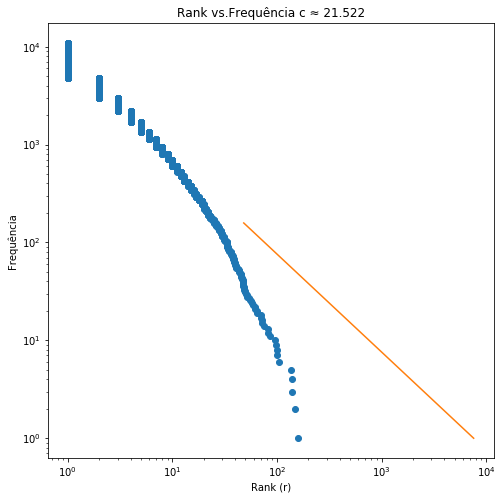

In [19]:
f, ax = plt.subplots(figsize=(8,8))
ax.set(xscale="log", yscale="log")

plt.plot(most_frequent_words["frequency"], most_frequent_words["r"], linestyle="", marker="o")
plt.plot(most_frequent_words["predicted_ranking"], most_frequent_words["frequency"], linestyle="-", marker="")
plt.title('Rank vs.Frequência c ≈ {0:.3f}'.format(c_unigram_expected))
plt.xlabel('Rank (r)')
plt.ylabel('Frequência')
plt.show()

## Conclusões do gráfico 

A linha de predição mostra que as predições são boas para valores altos(de 100 acima), enquanto que no gráfico de unigramas da atividade anterior, a predição conseguia ser mais assertiva para valores mais baixos.
